In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [34]:
def compare(template,img):
    delta=cv2.absdiff(template,img)
    return np.sum(delta)

def scan_oneline(template, img_span, kernalsize, step):
    h,w = img_span.shape
    min=255*h*h
    for i in range(0, w-kernalsize, step):
        s = compare(template,img_span[:,i:i+h])
        if s<min: 
            min = s
            loc = i
    return loc

def full_match(img1, img2, kernalsize, step):
    H, W = img1.shape
    matrix=np.zeros(img1.shape)

    for i in range(0, H-kernalsize, step):
        img1_span=img1[i:i+kernalsize,:]
        img2_span=img2[i:i+kernalsize,:]
        #print("scaning row:{}".format(i))

        for j in range(0, W-kernalsize, step):
            template1 = img1_span[:, j:j+kernalsize]
            loc = scan(template1, img2_span, kernalsize, step)
            disparity = j-loc # maybe not right here
            matrix[i:i+kernalsize, j:j+kernalsize] = disparity

    # change range to 0-255
    # HAS ERROR here
    res_matrix = np.zeros(matrix.shape)
    maxi=np.max(matrix)
    mini=np.min(matrix) 
    for r in range(H):
        for c in range(W):
            res_matrix[r,c] = matrix[r,c]*255/(maxi-mini)
 
    return res_matrix

7657


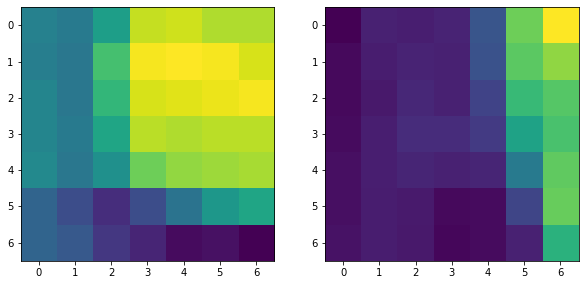

In [13]:
img_left = cv2.imread("nose_left.png")
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
img_right = cv2.imread("nose_right.png")
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

print(compare(gray_left,gray_right))

f, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(10,10))
ax_left.imshow(gray_left)
ax_right.imshow(gray_right)


In [15]:
img = cv2.imread("nose_left.png")
gray_left = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
span = cv2.imread("nose_span.png")
gray_span = cv2.cvtColor(span, cv2.COLOR_BGR2GRAY)

print(scan_oneline(gray_left,gray_span,7,4))

119


[[-17.45480839 -17.45480839 -17.45480839 ...   0.           0.
    0.        ]
 [-17.45480839 -17.45480839 -17.45480839 ...   0.           0.
    0.        ]
 [-17.45480839 -17.45480839 -17.45480839 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


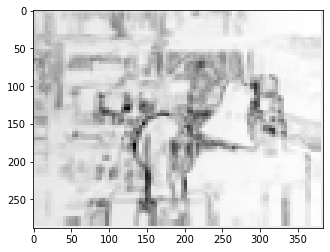

In [36]:
img_left = cv2.imread("tsukuba_left.png")
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)

img_right = cv2.imread("tsukuba_right.png")
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

res=full_match(gray_left,gray_right,7,7)
print(res)

plt.imshow(res, cmap='gray')